In [156]:
# SUNLIGHT: -4% production of orchids / 10 mins below 7 total hours
# HUMIDITY: -2% production of orchids / 5% abs below 60% or above 80% humidity

In [157]:
import pandas as pd

data = pd.read_csv("prices_round_2_day_0.csv", sep=';')
# print(data.columns)
sunlight = data["SUNLIGHT"]
humidity = data["HUMIDITY"]
orchids = data["ORCHIDS"]
time_stamp = data["timestamp"]
day = data["DAY"]
AVERAGE_SUNLIGHT = 2500
PERFECT_HUMIDITY = 70
HUMIDITY_RANGE = 10

predicted_orchids_list = list()
predicted_orchids_list.append(orchids[0])

for i in range(len(time_stamp)):
    current_humidity = humidity[i]
    current_sunlight = sunlight[i]

    humidity_red = 1
    humidity_dev = abs(current_humidity - PERFECT_HUMIDITY)
    if humidity_dev > HUMIDITY_RANGE:
        humidity_change = (humidity_dev / 5) - 2
        humidity_red = round(1 - humidity_change * 0.02, 3)
        
    # sunlight_red = 1
    # if current_sunlight < AVERAGE_SUNLIGHT:
    sunlight_dev = current_sunlight - AVERAGE_SUNLIGHT
    sunlight_red = 1 + sunlight_dev / (AVERAGE_SUNLIGHT * 40)
    if i + 1 < 10001:
        predicted_orchids = orchids[i + 1] * humidity_red * sunlight_red
        predicted_orchids_list.append(predicted_orchids)

data["P_ORCHIDS"] = predicted_orchids_list


In [158]:
import math
# print("Average Orchids: " + str(data["ORCHIDS"].mean())
#       + "\nAverage Predicted Orchids: " + str(data["P_ORCHIDS"].mean()))
predicted_orchid_data = data["P_ORCHIDS"]
curr_pred_sq_sum = 0
for i in range(1001):
    current_orchid = orchids[i]
    predicted_orchid = predicted_orchid_data[i]
    curr_min_pred = current_orchid - predicted_orchid
    curr_pred_sq_sum += math.pow(curr_min_pred, 2)
orchids_mse = curr_pred_sq_sum / 1001
orchids_rmse = math.sqrt(orchids_mse)
print(str(orchids_rmse))
        

39.99397732064697


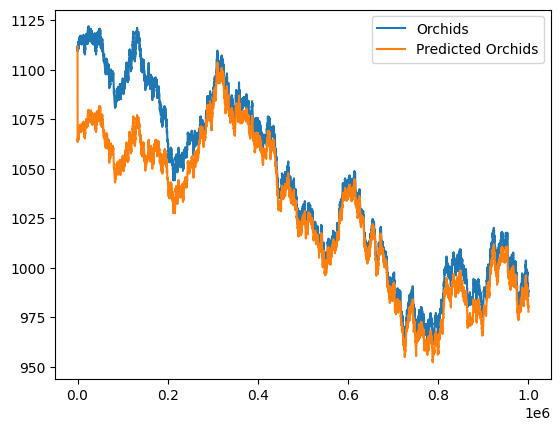

In [159]:
import matplotlib.pyplot as plt
plt.plot(time_stamp, data["ORCHIDS"], label="Orchids")
plt.plot(time_stamp, data["P_ORCHIDS"], label="Predicted Orchids")
plt.legend(loc = 'best')